In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../CommonUtils/') # https://github.com/glukicov/EDMTracking/tree/master/CommonUtils
import CommonUtils as cu
font_size=16
import matplotlib.pyplot as plt

g2period = 4.365411
font_size=14
ds_name="60h"
station=12

In [2]:
data_hdf = pd.read_hdf("../DATA/HDF/EDM/60h.h5")

In [3]:
mom_cut = ( (data_hdf['trackMomentum'] > 1800) & (data_hdf['trackMomentum'] < 3100) ) # MeV  
time_cut =( (data_hdf['trackT0'] > 30.6) & (data_hdf['trackT0'] < 450) ) # MeV  
data_hdf=data_hdf[mom_cut & time_cut]
data=data_hdf[data_hdf['station']==12]

In [4]:
g2period=4.365411
x, y, y_e = cu.get_freq_bin_c_from_data(cu.get_g2_mod_time(data['trackT0'], g2period), 15*1e-3, (0, g2period) )

In [5]:
cu._omega=1.34
par, par_e, pcov, chi2_ndf, ndf = cu.fit_and_chi2(x, y, y_e, cu.unblinded_wiggle_fixed, (10000, 64.4, 0.3, 2))

Params: [ 1.292925998e+04 -5.274147358e+08  3.160762054e-01  2.370543254e+00]
Errors: [3.525307286e+01 1.188195542e+14 3.120310034e-03 1.016799935e-02]
Fit 𝝌2/DoF= 18.41(8) 𝝌2: 5283 DoF: 287


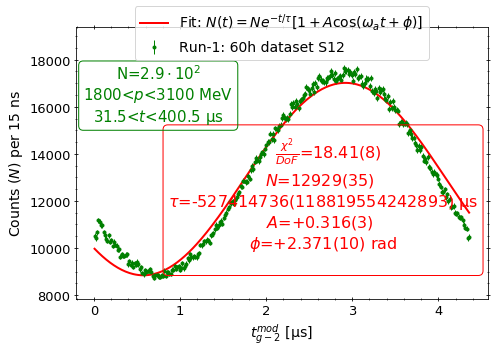

In [6]:
fig, ax, leg_data, leg_fit = cu.plot_edm(x, y, y_e, cu.unblinded_wiggle_fixed, 
                             par, par_e, chi2_ndf, ndf, 15*1e-3, len(x),
                             31.5, 400.5, 1800, 3100,
                              [r"$N$", r"$\tau$", r"$A$", r"$\phi$"], [" ",  r"$\rm{\mu}$s", " ", "rad"], 
                             legend_data = "Run-1: "+ds_name+" dataset S"+str(station),
                             legend_fit=r'Fit: $N(t)=Ne^{-t/\tau}[1+A\cos(\omega_at+\phi)]$',
                             ylabel=r"Counts ($N$) per "+str(int(15*1e-3*1e3))+" ns",
                             font_size=font_size,
                             prec=3)


cu.textL(ax, 0.6, 0.35, leg_fit, c="r", fs=font_size+2); cu.textL(ax, 0.2, 0.75, leg_data, fs=font_size+1)
ax.set_ylim(np.amin(y)*0.9, np.amax(y)*1.1);